In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[0])

NUM_DIGITS = 10
trainLabels = to_categorical(train_labels, NUM_DIGITS)
testLabels = to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(units=200, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=200, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
tbCallback = TensorBoard(log_dir="./logs/demo70", histogram_freq=0,
                         write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[tbCallback])

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   

In [3]:
predictedLabels = model.predict_classes(testImages)
predictedLabels[:10]

c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [4]:
predicted = model.predict(testImages)
predicted[:10]

array([[0.0000000e+00, 0.0000000e+00, 6.8399163e-37, 3.4492959e-31,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 6.6664779e-36],
       [0.0000000e+00, 7.9685257e-32, 1.0000000e+00, 1.0345621e-36,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0951068e-28, 1.0000000e+00, 5.6673558e-14, 7.2018520e-23,
        9.4184489e-18, 3.3438065e-18, 8.8033358e-19, 3.2190080e-11,
        3.3286194e-13, 7.8764542e-21],
       [1.0000000e+00, 2.8332035e-31, 2.1558304e-17, 1.7480078e-20,
        2.1770037e-24, 4.6300909e-17, 6.2237174e-11, 9.5119702e-17,
        3.2011166e-19, 5.4352551e-13],
       [3.0865724e-35, 0.0000000e+00, 1.2860745e-30, 1.1462960e-37,
        1.0000000e+00, 5.3566940e-33, 3.6766583e-33, 4.0594944e-22,
        1.3808324e-35, 1.5402090e-17],
       [4.0806379e-31, 1.0000000e+00, 2.0557005e-20, 2.6499061e-25,
        1.7212123e-13, 1.4685108e-26, 1.9515772e-27, 8.89

In [5]:
predicted_prob = model.predict_proba(testImages)
predicted_prob[:10]


c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.0000000e+00, 0.0000000e+00, 6.8399163e-37, 3.4492959e-31,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 6.6664779e-36],
       [0.0000000e+00, 7.9685257e-32, 1.0000000e+00, 1.0345621e-36,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0951068e-28, 1.0000000e+00, 5.6673558e-14, 7.2018520e-23,
        9.4184489e-18, 3.3438065e-18, 8.8033358e-19, 3.2190080e-11,
        3.3286194e-13, 7.8764542e-21],
       [1.0000000e+00, 2.8332035e-31, 2.1558304e-17, 1.7480078e-20,
        2.1770037e-24, 4.6300909e-17, 6.2237174e-11, 9.5119702e-17,
        3.2011166e-19, 5.4352551e-13],
       [3.0865724e-35, 0.0000000e+00, 1.2860745e-30, 1.1462960e-37,
        1.0000000e+00, 5.3566940e-33, 3.6766583e-33, 4.0594944e-22,
        1.3808324e-35, 1.5402090e-17],
       [4.0806379e-31, 1.0000000e+00, 2.0557005e-20, 2.6499061e-25,
        1.7212123e-13, 1.4685108e-26, 1.9515772e-27, 8.89

In [6]:
import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("test image marked as %d, predict as %d"%(test_labels[index],predictedLabels[index]))
    plt.imshow(test_images[index],cmap='binary')
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

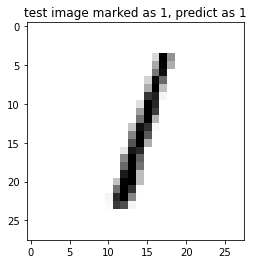

In [7]:
plotTestImage(2)

In [8]:
import pandas as pd
pd.crosstab(test_labels, predictedLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,1,1,0,2,3,2,1,0,1
1,0,1121,4,2,0,2,2,2,2,0
2,0,2,1016,4,3,1,1,4,1,0
3,0,0,4,986,0,6,0,4,0,10
4,1,0,2,0,965,0,3,4,0,7
5,2,0,0,7,1,873,3,0,2,4
6,2,2,1,1,6,10,934,0,1,1
7,0,0,14,2,0,0,0,1004,1,7
8,2,1,2,6,4,5,1,4,942,7


In [9]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictedLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [10]:
measure1[(measure1.label==3)&(measure1.predict==5)]

,label,predict
938,3,5
1166,3,5
2618,3,5
3138,3,5
3943,3,5
4740,3,5


<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

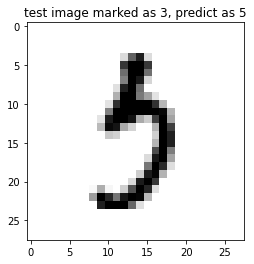

In [13]:
plotTestImage(4740)

In [14]:
errors = measure1[(measure1.label==3)&(measure1.predict==5)]

938


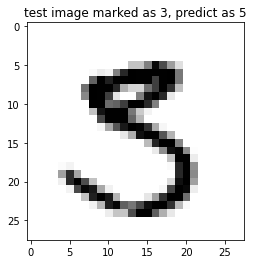

1166


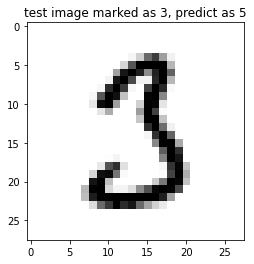

2618


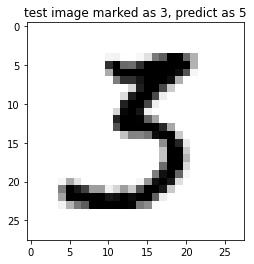

3138


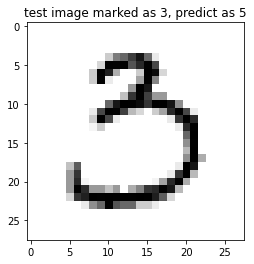

3943


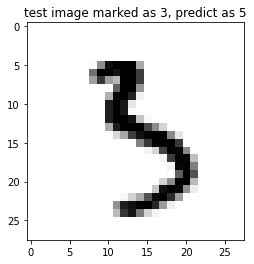

4740


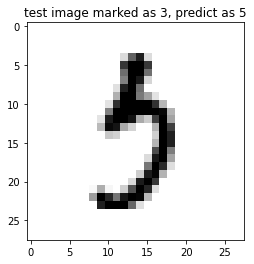

In [17]:
for errId in errors.index:
    print(errId)
    plotTestImage(errId)
    plt.show()  #with this, only show the last image